# UCI-SECOM : Logistic Regression Code - 3
📌 목적 : 가장 적합한 로지스틱 회귀 모델 만들기

📍 Logistic Rregression Code2와 전처리 방식만 달라진 코드 📍

### 데이터 분석 과정
- 데이터 전처리 : Null 값의 비율이 50%가 넘는 칼럼은 삭제하고 남은 결측값은 앞 또는 뒤 값을 가져옴
- 스케일링: StandardScaler, PCA
- 모델링 : Logistic Regression
- 교차 검증 : cross_val_score
- 평가 : confusion matrix, accuracy score, recall score, F1_score, RMSE

## 1. 라이브러리 import

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter("ignore")  #파이썬 경고 억제

## 2. 데이터 로딩

In [53]:
dataset = pd.read_csv("uci-secom.csv")

In [54]:
dataset.head()  #데이터 확인

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [55]:
dataset.isnull().any().any()  #Null 값 존재 여부 확인

True

## 3. 결측값 처리
- null_values() 함수 정의
- null값의 비율이 50%가 넘어가는 칼럼 삭제
- 남은 결측값에는 앞 또는 뒤에 있는 값 가져오기

### 3.1 null_values() 함수 정의

In [56]:
def null_values(dataset):
    nv=pd.concat([dataset.isnull().sum(), 100 * dataset.isnull().sum()/dataset.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)

In [57]:
dataset_na = null_values(dataset)
dataset_na

,Missing_Records,Percentage (%)
292,1429,91.193363
293,1429,91.193363
157,1429,91.193363
158,1429,91.193363
358,1341,85.577537
...,...,...
456,1,0.063816
218,1,0.063816
356,1,0.063816
457,1,0.063816


In [58]:
dataset_na = dataset_na[dataset_na["Percentage (%)"] > 70]
dataset_na

,Missing_Records,Percentage (%)
292,1429,91.193363
293,1429,91.193363
157,1429,91.193363
158,1429,91.193363
358,1341,85.577537
85,1341,85.577537
492,1341,85.577537
220,1341,85.577537


In [59]:
dataset_na.shape

(8, 2)

In [60]:
dataset_na.index

Index(['292', '293', '157', '158', '358', '85', '492', '220'], dtype='object')

### 3.2 50%가 넘는 칼럼 삭제

In [61]:
dataset = dataset.drop(axis=1, columns=dataset_na.index)
dataset.shape

(1567, 584)

In [62]:
dataset.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


### 3.3 결측값 처리

In [63]:
dataset.fillna(method='ffill', inplace=True)
dataset.fillna(method='bfill', inplace=True)
dataset

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,208.2045,0.5005,0.0118,0.0035,2.3630,0.0096,0.0201,0.0060,208.2045,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,73.8432,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,203.1720,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.4333,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


✅ dataset.fillna(method='ffill', inplace=True) : 결측값을 앞방향으로 채우기(앞에 있는 값을 가져오기)  
✅ dataset.fillna(method='bfill', inplace=True) : 결측값을 뒷방향으로 채우기(뒤에 있는 값을 가져오기)

In [64]:
null_values(dataset)

,Missing_Records,Percentage (%)


In [65]:
dataset.shape

(1567, 584)

In [66]:
# nunique() 함수를 써서 5열의 고유치 개수를 확인
dataset["5"].nunique()

1

In [67]:
# Column '5'와 같이 고유값이 1개인 열을 저장하는 unique_columns함수 생성
def unique_columns(df):
    uni_col_list = []
    for column in df.columns:
        if df[column].nunique() == 1:
            uni_col_list.append(column)
    return uni_col_list

In [68]:
# 고유치 개수가 1개인 열의 개수 확인
len(unique_columns(dataset))

116

In [69]:
dataset.shape

(1567, 584)

In [70]:
dataset = dataset.drop(axis=1, columns=unique_columns(dataset))
dataset.shape

(1567, 468)

## 4. 데이터 분리

### 4.1 Pass/Fail 칼럼 분리

In [71]:
X = dataset.drop(['Pass/Fail','Time'],axis=1)  #Time과 Pass/Fail 칼럼 삭제한 값 X에 저장
y = dataset['Pass/Fail']  #Pass/Fail 칼럼만 y에 저장

print("shape of x:", X.shape)
print("shape of y:", y.shape)

shape of x: (1567, 466)
shape of y: (1567,)


In [72]:
X.head()

,0,1,2,3,4,6,7,8,9,10,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,0.0060,208.2045,0.5005,0.0118,0.0035,2.3630,0.0096,0.0201,0.0060,208.2045
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,0.0044,73.8432,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [73]:
X_resample, y_resample  = SMOTE(random_state=1).fit_sample(X, y.values.ravel())

print(X_resample.shape)
print(y_resample.shape)

(2926, 466)
(2926,)


In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3, random_state = 1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2048, 466)
(2048,)
(878, 466)
(878,)


## 5. 스케일링
1. StandardScaler
2. PCA

✔ y 데이터는 스케일링 안함.

### 5.1 StandardScaler
- 표준화를 쉽게 하기 위해 지원하는 클래스
- 평균이 0이고 분산이 1인 값으로 변환

#### 5.1.1 StandardScaler를 적용하기 전 데이터 평균값과 분산값

In [76]:
print('X_train의 평균값 ')
print(X_train.mean())

print('\nX_train의 분산값')
print(X_train.var())

X_train의 평균값 
0      3010.969940
1      2493.066509
2      2200.468612
3      1380.083955
4         3.497813
          ...     
585       3.062529
586       0.021694
587       0.017209
588       0.005500
589     100.229816
Length: 466, dtype: float64

X_train의 분산값
0        5411.662901
1        5181.758577
2         714.626796
3      137515.035761
4        2409.479031
           ...      
585         5.512445
586         0.000129
587         0.000068
588         0.000007
589      6687.847774
Length: 466, dtype: float64


#### 5.1.2 StandardScaler 적용

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
#StandardScaler 객체 생성
sc = StandardScaler()

#StandScaler로 데이터 세트 변환
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

X_sc = sc.fit_transform(X)

In [79]:
X_sc_pd = pd.DataFrame(X_sc)
X_sc_pd.head()  #표준화된 데이터 확인

,0,1,2,3,4,5,6,7,8,9,...,456,457,458,459,460,461,462,463,464,465
0,0.225661,0.848549,-0.438248,0.030352,-0.050141,-0.553885,0.265085,0.510062,1.128800,-0.380965,...,0.249960,1.155458,0.117015,-0.204837,-0.093217,-0.197053,-0.959280,0.411568,0.249960,1.155458
1,1.106653,-0.382768,1.010742,0.149398,-0.059605,0.200866,0.321051,0.457237,0.023070,-1.607223,...,0.249960,1.155458,0.527813,0.406731,0.444697,0.385118,-0.959280,0.411568,0.249960,1.155458
2,-1.110023,0.797981,-0.483128,0.680468,-0.047466,-0.893044,0.253892,-0.260632,0.327643,0.124597,...,3.321193,-0.179810,-1.262092,0.022317,0.014366,0.029892,2.990884,3.626604,3.321193,-0.179810
3,-0.347765,-0.198930,-0.054692,-1.105709,-0.050851,0.502989,-0.014743,0.343462,-0.764845,-0.370208,...,-0.308446,-0.275866,-0.323126,-0.292204,-0.362173,-0.283356,-0.101252,-0.179181,-0.308446,-0.275866
4,0.243458,0.087165,1.110687,-0.161373,-0.047053,-0.109747,0.186733,0.545278,-0.149079,-0.789718,...,-0.308446,-0.275866,-5.898239,26.867225,27.071414,26.913331,-0.101252,-0.179181,-0.308446,-0.275866


In [80]:
#DataFrame 형태로 변경
X_train_sc_pd = pd.DataFrame(X_train_sc)
X_test_sc_pd = pd.DataFrame(X_test_sc)

In [81]:
print('X_train_sc의 평균값 ')
print(X_train_sc_pd.mean())

print('\nX_train_sc의 분산값')
print(X_train_sc_pd.var())

X_train_sc의 평균값 
0     -5.665824e-15
1     -3.099951e-15
2      8.025048e-15
3     -9.400033e-17
4      6.777280e-17
           ...     
461   -9.304826e-17
462    2.818112e-16
463   -1.035413e-16
464    1.678345e-16
465    3.171291e-17
Length: 466, dtype: float64

X_train_sc의 분산값
0      1.000489
1      1.000489
2      1.000489
3      1.000489
4      1.000489
         ...   
461    1.000489
462    1.000489
463    1.000489
464    1.000489
465    1.000489
Length: 466, dtype: float64


✅ StandScaler 적용 후 데이터가 넘파이 형태로 바뀌어서 X_train_sc과 X_test_sc 값이 다르게 나왔었음.   
✅ DataFrame 형태로 바꾸니까 원래와 같은 형태로 출력됨.

### 5.2 PCA(주성분 분석)
- 가장 대표적인 차원 축소 기법
- 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법
- 기존 데이터의 정보 유실이 최소화를 목표로 함
- 가장 높은 분산을 가진 데이터 축이 PCA의 주성분

In [82]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
pca = PCA(n_components=0.85)
X_sc_pca = pca.fit_transform(X_sc)

X_sc_pca_pd = pd.DataFrame(data = X_sc_pca)

In [84]:
print('Variance of each component:', pca.explained_variance_ratio_)
print('\nTotal features:', pca.n_components_)
print('Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.05563923 0.037629   0.02932635 0.02654688 0.02300414 0.02079379
 0.02000604 0.01861125 0.01828267 0.01650326 0.01478023 0.01349982
 0.01325192 0.01292919 0.01279348 0.01190648 0.01168652 0.01156351
 0.01112504 0.01077061 0.0103935  0.01009448 0.01006794 0.00980497
 0.00966196 0.00956248 0.00921949 0.00915886 0.00889536 0.00858968
 0.00846439 0.00827032 0.00820705 0.00799204 0.00792338 0.00774467
 0.00769571 0.00754158 0.00736581 0.00723077 0.00704769 0.0068964
 0.00686822 0.00679933 0.00670875 0.00646323 0.00644531 0.00624872
 0.0062248  0.00619898 0.00602358 0.00598587 0.00590454 0.00572554
 0.00567124 0.00563625 0.00552277 0.00545729 0.00537709 0.00530096
 0.00516835 0.00503192 0.00498043 0.00492876 0.00485016 0.00478433
 0.00474425 0.00460501 0.00455382 0.0045077  0.0044587  0.00431686
 0.00427756 0.00423286 0.00417812 0.00413494 0.00394656 0.00389426
 0.00380238 0.00376564 0.00362959 0.00361956 0.0034938  0.00339891
 0.00331111 0.00324795 0.00321329 0

In [85]:
X_train_sc_pca = pca.transform(X_train_sc)
X_test_sc_pca = pca.transform(X_test_sc)

In [86]:
X_sc_pca_pd

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,-1.528785,3.887027,4.202854,-1.447021,0.590586,-1.618735,-1.298667,1.928437,-0.339670,2.256077,...,0.022940,0.358819,-0.167507,-0.745390,-1.048820,-0.070842,0.825566,0.380791,0.022744,-0.292978
1,-2.062059,1.693728,3.479608,-1.471795,0.250007,-2.263755,-1.472739,1.096630,-2.113363,3.373821,...,0.088704,-0.684422,-2.741903,0.767656,1.742557,-0.473354,-0.421098,-1.219367,0.213419,0.154729
2,0.225486,1.409913,1.484002,-0.056108,0.904730,2.011617,-2.327031,1.049771,-1.108202,2.338536,...,-0.243491,-0.447263,-1.402576,-1.202511,0.565747,0.166075,1.628543,0.774033,2.521177,-1.775701
3,1.161608,5.416491,4.583830,-2.189103,2.568734,0.881784,-7.421586,-2.115276,10.588116,6.045948,...,0.775258,0.037572,-0.669339,-0.688766,0.533449,1.082079,-0.007600,0.225774,-1.787063,1.638715
4,0.789261,2.442118,2.143813,0.878505,2.220493,3.028237,-5.011097,-0.946513,3.322911,-1.625787,...,-0.569138,-0.752405,-0.227341,-1.798991,-0.567631,-1.116387,0.763033,0.527807,-0.022538,2.091063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,-1.122653,-4.429682,-3.752881,4.795178,-0.898177,2.168964,-1.175343,-0.321836,0.666553,1.811817,...,-1.276055,-0.851996,-1.096063,-1.475882,-0.651141,0.384145,-0.702994,0.224338,-0.708107,0.036724
1563,-0.397683,0.164038,1.594359,1.139066,1.331773,0.783514,-1.908488,3.457182,-4.661809,1.877047,...,-0.011657,-2.209410,-1.160620,-0.542391,-1.502860,1.270235,-0.328162,0.643435,-0.969230,1.342378
1564,-1.346075,-1.709707,-1.102000,1.638097,-1.705846,-1.973669,0.072104,-0.910968,-0.756745,0.198964,...,0.876062,-0.731249,-0.444427,-1.720896,-0.344806,0.292829,0.626498,-0.054277,-1.108876,1.297086
1565,-1.228133,-3.917665,-4.211916,2.268799,0.197089,2.930403,-2.810505,0.977666,0.447948,1.035490,...,0.118843,-0.313852,1.175856,-1.626799,-0.230143,0.278049,2.005358,0.646158,-0.213678,-0.667140


In [87]:
X_sc_pca_pd.describe()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
count,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,...,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03
mean,6.801622e-18,6.960326e-16,2.121539e-15,-3.327127e-16,6.879557e-17,8.502027e-17,1.652227e-16,-3.972572e-16,-2.868017e-16,-3.436944e-16,...,9.245954e-18,-9.316805e-18,5.250002e-17,-1.111463e-17,3.372471e-17,-4.031378e-17,-2.086539e-17,-1.888158e-17,5.597168e-18,-4.375001e-17
std,5.093568e+00,4.188832e+00,3.697946e+00,3.518344e+00,3.275176e+00,3.113855e+00,3.054303e+00,2.945909e+00,2.919789e+00,2.774064e+00,...,1.119960e+00,1.115543e+00,1.108364e+00,1.098205e+00,1.081474e+00,1.079755e+00,1.066744e+00,1.060824e+00,1.058262e+00,1.052488e+00
min,-4.486621e+00,-8.190497e+00,-1.954522e+01,-6.800242e+00,-2.553685e+01,-3.543928e+01,-8.260316e+00,-4.042166e+01,-2.378623e+01,-1.490051e+01,...,-4.823669e+00,-4.469920e+00,-3.854445e+00,-4.513441e+00,-3.963660e+00,-4.638085e+00,-4.407504e+00,-3.246474e+00,-4.568316e+00,-5.207150e+00
25%,-1.179326e+00,-2.403277e+00,-1.879551e+00,-1.575374e+00,-1.239962e+00,-1.588949e+00,-1.802224e+00,-1.172133e+00,-1.869044e+00,-1.793138e+00,...,-6.966781e-01,-7.357059e-01,-7.507544e-01,-7.199705e-01,-7.372497e-01,-6.913084e-01,-6.732002e-01,-6.985001e-01,-6.902106e-01,-6.946622e-01
50%,-4.803351e-01,-6.102138e-01,-5.656723e-02,-2.588204e-01,-1.550331e-01,5.172529e-02,1.819813e-02,7.974217e-02,-1.623201e-01,-6.932203e-02,...,-1.491908e-02,1.231474e-02,-3.346544e-02,-2.030277e-02,-1.066410e-02,6.074712e-04,-3.172581e-02,-5.790100e-03,-1.891057e-02,-4.405122e-02
75%,4.828505e-01,1.495241e+00,2.193128e+00,1.249767e+00,9.034325e-01,1.595604e+00,1.583673e+00,1.265093e+00,1.465092e+00,1.771929e+00,...,7.201051e-01,6.860242e-01,7.115226e-01,7.344110e-01,7.058950e-01,6.718969e-01,6.671341e-01,6.958957e-01,7.149147e-01,6.515793e-01
max,1.059247e+02,3.084636e+01,7.721514e+01,1.099817e+02,5.578451e+01,6.033881e+01,7.030904e+01,7.038536e+01,2.704764e+01,1.879238e+01,...,5.690956e+00,4.548293e+00,4.916979e+00,4.641956e+00,4.336062e+00,5.177333e+00,4.612636e+00,4.955531e+00,5.312107e+00,6.712209e+00


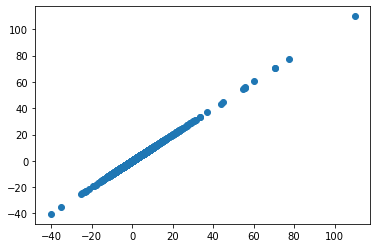

In [88]:
plt.scatter(X_sc_pca[:,1:-1], X_sc_pca[:,1:-1])

✅ Scatter plot(산점도) 그리기  
✅ 산점도 : 두 연속형 변수의 상관관계를 나타낼 수 있는 유용한 시각화 도구  
✅ x축과 y축의 데이터로 인식 / 순서쌍이 만들어지게 되어 해당 좌표에 마커(Marker) 출력

## 6. 로지스틱 회귀 모델 수행

### 6.1 교차검증 후 로지스틱 회귀 모델 적용
1. cross_val_score() 이용
2. cross_validate() 이용

In [89]:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, roc_auc_score, precision_score, recall_score

#### 6.1.1 cross_val_score()

In [90]:
classifier = LogisticRegression(random_state=1)

score = cross_val_score(classifier, X_train_sc_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')

In [91]:
print('교차 검증별 정확도 : ', np.round(score,4))
print('평균 검증 정확도 : ', np.round(np.mean(score),4))

교차 검증별 정확도 :  [0.8049 0.7561 0.8098 0.7902 0.8049 0.8098 0.7854 0.8049 0.8088 0.8431]
평균 검증 정확도 :  0.8018


#### cross_val_score(estimator, X, y=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')  
✅ estimator : 사이킷런의 분류 알고리즘 클래스인 Classifier 또는 회귀 알고리즘 클래스인 Regressor를 의미  
✅ X : 피처 데이터 세트  
✅ y : 레이블 데이터 세트  
✅ scoring : 예측 성능 평가 지표  
✅ cv : 교차 검증 폴드 수

#### 6.1.2 cross_validate()

In [92]:
classifier = LogisticRegression(random_state=10)

cross_validate(classifier, X_train_sc_pca, y_train, cv=10, n_jobs=-1, scoring=['accuracy','roc_auc', 'recall','precision'])

{'fit_time': array([0.18769479, 0.21108651, 0.14588761, 0.15888453, 0.19278717,
        0.16760874, 0.20104742, 0.16530371, 0.06004262, 0.05208993]),
 'score_time': array([0.00801754, 0.        , 0.0156424 , 0.01224399, 0.00934148,
        0.00801754, 0.        , 0.00956631, 0.        , 0.        ]),
 'test_accuracy': array([0.80487805, 0.75609756, 0.8097561 , 0.7902439 , 0.80487805,
        0.8097561 , 0.78536585, 0.80487805, 0.80882353, 0.84313725]),
 'test_roc_auc': array([0.85341709, 0.77879307, 0.90824291, 0.86226918, 0.88387588,
        0.87464306, 0.81048924, 0.87064535, 0.8929258 , 0.89426127]),
 'test_recall': array([0.88349515, 0.84466019, 0.81553398, 0.80582524, 0.77669903,
        0.86407767, 0.87378641, 0.87378641, 0.87254902, 0.9223301 ]),
 'test_precision': array([0.76470588, 0.71900826, 0.80769231, 0.78301887, 0.82474227,
        0.78070175, 0.74380165, 0.76923077, 0.77391304, 0.79831933])}

#### cross_validate() : 다중 평가 지표
✅ 하나의 평가 지표만 담을 수 있는 cross_val_score과는 달리 여러개의 평가 지표를 활용할 수 있음.

### 6.2 로지스틱 모델 수행(교차검증x)

In [93]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train_sc_pca, y_train)
lr_preds = lr_clf.predict(X_test_sc_pca)

In [94]:
print('accuracy : {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc : {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))
print('precision : {:0.3f}'.format(precision_score(y_test, lr_preds)))
print('recall : {:0.3f}'.format(recall_score(y_test, lr_preds)))

accuracy : 0.815
roc_auc : 0.816
precision : 0.798
recall : 0.839


### 6.3 GridSearchCV 적용 후 로지스틱 회귀 모델 수행

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
params = {'penalty':['l2','l1'], 'C':[0.01,0.1,1,1,5,10]}

In [97]:
grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=10)
grid_clf.fit(X_train_sc_pca, y_train)

print('최적의 하이퍼 파라미터:{0}, 최적의 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적의 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적의 평균 정확도:0.802


✅ GridSearchCV를 이용하여 최적의 하이퍼 파라미터와 최적의 평균 정확도 계산

### 6.4 plot_result 함수 정의 후 로지스틱 회귀 모델 적용

In [98]:
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error

In [99]:
cv_acc = {}  #cross validation accuracy

cv_TPR = {}  #cross validation true positive rate   --- TP / (FN + TP)

cv_FPR = {}  #cross validation false positive rate  --- FP / (FP + TN)

In [100]:
def plot_result(model, name:str):
    
    model.fit(X_train_sc_pca, y_train)
    y_pred = model.predict(X_test_sc_pca)

    scoring = ['balanced_accuracy', 'recall_macro']
    scores = cross_val_score(model, X_test_sc_pca, y_test, cv=10, scoring = 'balanced_accuracy')  #교차검증
    
    cv_acc[name] = round(scores.mean(), 4)*100 
    cv_TPR[name] = (confusion_matrix(y_test, y_pred)[1][1]/confusion_matrix(y_test, y_pred)[1].sum())*100  
    cv_FPR[name] = (confusion_matrix(y_test, y_pred)[0][1]/confusion_matrix(y_test, y_pred)[0].sum())*100 
    
    print('Average Balanced Accuracy (CV=10):', scores.mean())

    print(classification_report(y_test, y_pred, zero_division=0))
    
    plot_confusion_matrix(model, X_test_sc_pca, y_test)
    plt.show()

Average Balanced Accuracy (CV=10): 0.7943939393939394
              precision    recall  f1-score   support

          -1       0.83      0.79      0.81       444
           1       0.80      0.84      0.82       434

    accuracy                           0.82       878
   macro avg       0.82      0.82      0.82       878
weighted avg       0.82      0.82      0.82       878



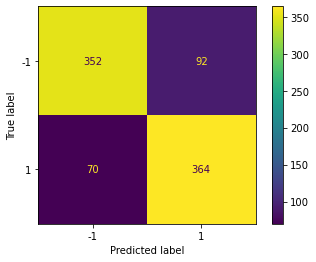

In [101]:
plot_result(classifier, "lr")

✅ Balanced accuracy(균형 정확도) : 각 클래스 재현율의 산술 평균  
✅ 목표: 1에 가까울수록 좋음  
✅ 범위: [0, 1]

✅ -1 : Negavtive / 1 : Positive  
✅ 1에 해당하는 값들이 모두 0일 경우 balanced accuracy 값이 좋음  

In [102]:
y_pred = classifier.predict(X_test_sc_pca)

mse = mean_squared_error(y_test,y_pred) # 교재 부분 보니까 (y_test, ypreds)로 해놓음
rmse = np.sqrt(mse)

print('RMSE', rmse)


RMSE 0.8590931278260259
